In [1]:
from matplotlib import pyplot, cm
from math import pi
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

x=numpy.linspace(0,l,nx)
y=numpy.linspace(0,h,ny)

omegai=numpy.zeros((ny,nx))
psii=numpy.zeros((ny,nx))

l1_target = 1e-6

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [4]:
def stokes(omega,psi,dx,dy,l1_target):
    l1norm=1.
    omegan=numpy.empty_like(omega)
    psin=numpy.empty_like(psi)
    uj=numpy.ones(nx)
    iterations=1
    while l1norm>l1_target:
        omegan = omega.copy()
        psin=psi.copy()
        
        psi[1:-1,1:-1]=((psin[2:,1:-1]+psin[:-2,1:-1])*dx**2+(psin[1:-1,2:]+psin[1:-1,:-2])*dy**2+omega[1:-1,1:-1]*dx**2*dy**2)/(2.*(dx**2+dy**2))      
        omega[1:-1,1:-1]=((omegan[2:,1:-1]+omegan[:-2, 1:-1])*dx**2+(omegan[1:-1,2:]+omegan[1:-1,:-2])*dy**2)/(2*(dx**2+dy**2))
        
        #B.C.
        omega[-1,:]=-.5/(dy**2)*(8.*psi[-2,:]-psi[-3,:])-3.*uj/dy
        omega[0,:]=-.5/(dy**2)*(8.*psi[1,:]-psi[2,:])
        omega[:,-1]=-.5/(dx**2)*(8.*psi[:,-2]-psi[:,-3])
        omega[:,0]=-.5/(dx**2)*(8.*psi[:,1]-psi[:,2])
        
        l1norm=max(L1norm(omega,omegan),L1norm(psi,psin))
        iterations+=1
    return numpy.array([omega,psi])

In [5]:
A=stokes(omegai.copy(),psii.copy(),dx,dy,1e-6)
omega=A[0]
psi=A[1]

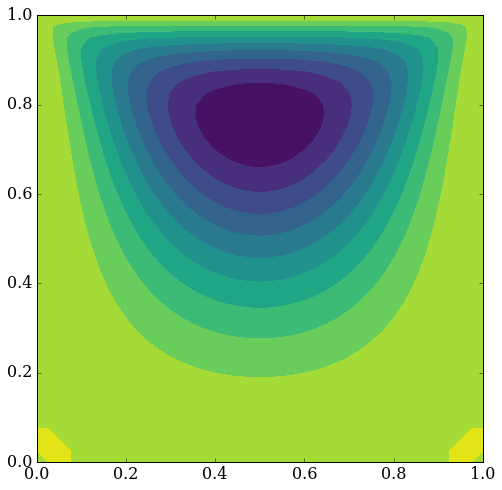

In [6]:
pyplot.figure(figsize=(8,8))
pyplot.contourf(x,y,psi,10,cmap=cm.viridis)

In [7]:
numpy.abs(psi).max()

0.099845172462224088

In [8]:
numpy.abs(omega).max()

78.192661228600699

In [9]:
numpy.round(psi[32,::8],4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])